# ME314 Homework 1

###Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. Your homework will be graded IFF you submit a **single** PDF and a link to a Google colab file that meet all the requirements outlined below.

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) and include simplified code outputs (e.g. .simplify()).
- Enable Google Colab permission for viewing 
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change" 
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

___________________________

Collaborators for this homework: Noah Yi

In [1]:
#IMPORT ALL NECESSARY PACKAGES AT THE TOP OF THE CODE
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown, display


In [33]:
# for google colab only

# def custom_latex_printer(exp,**options):
#     from google.colab.output._publish import javascript
#     url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.1/latest.js?config=TeX-AMS_HTML"
#     javascript(url=url)
#     return sym.printing.latex(exp,**options)
# sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

# Helper Functions

In [34]:
#PURPOSE: make a set of functions I can use in later homeworks to optimize the process
#of simulating entire systems. I thought that was the purpose of this homework but I was
#wrong - so I made a bunch of functions I can use later

def compute_EL(lagrangian, q):
    '''
    Helper function for computing the Euler-Lagrange equations for a given system,
    so I don't have to keep writing it out over and over again.
    
    Inputs:
    - lagrangian: our Lagrangian function in symbolic (Sympy) form
    - q: our state vector [x1, x2, ...], in symbolic (Sympy) form
    
    Outputs:
    - eqn: the Euler-Lagrange equations in Sympy form
    '''
    
    # wrap system states into one vector (in SymPy would be Matrix)
    #q = sym.Matrix([x1, x2])
    qd = q.diff(t)
    qdd = qd.diff(t)

    # compute derivative wrt a vector, method 1
    # wrap the expression into a SymPy Matrix
    L_mat = sym.Matrix([lagrangian])
    dL_dq = L_mat.jacobian(q)
    dL_dqdot = L_mat.jacobian(qd)

    #set up the Euler-Lagrange equations
    LHS = dL_dq - dL_dqdot.diff(t)
    RHS = sym.Matrix([0,0]).T
    eqn = sym.Eq(LHS.T, RHS.T)
    
    return eqn


def solve_EL(eqn, q):
    '''
    Helper function to solve and display the solution for the Euler-Lagrange
    equations.
    
    Inputs:
    - eqn: Euler-Lagrange equation (type: Sympy Equation())
    - q: state vector (type: Sympy Matrix)
    
    Outputs:
    - Prints symbolic solutions
    - Returns symbolic solutions in a dictionary
    '''
    qd = q.diff(t)
    qdd = qd.diff(t)
    
    soln = sym.solve(eqn, qdd, dict = True)
    eqns_solved = []
    
    for sol in soln:
        for x in qdd:
            eqn_solved = sym.Eq(x, sol[x])
            eqns_solved.append(eqn_solved)
            
    return eqns_solved

#test
# lagrangian2 = lagrangian
# q2 = q
# eqn = compute_EL(lagrangian2, q2)
# display(eqn)

# solns_list = solve_EL(eqn, q2)
# for soln in solns_list:
#     display(soln)

In [30]:

def rk4(dxdt, x, t, dt):
    '''
    Applies the Runge-Kutta method, 4th order, to a sample function,
    for a given state q0, for a given step size. Currently only
    configured for a 2-variable dependent system (x,y).
    ==========
    dxdt: a Sympy function that specifies the derivative of the system of interest
    t: the current timestep of the simulation
    x: current value of the state vector
    dt: the amount to increment by for Runge-Kutta
    ======
    returns:
    x_new: value of the state vector at the next timestep
    '''  
    k1 = dt * dxdt(t, x)
    k2 = dt * dxdt(t + dt/2.0, x + k1/2.0)
    k3 = dt * dxdt(t + dt/2.0, x + k2/2.0)
    k4 = dt * dxdt(t + dt, x + k3)
    x_new = x + (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    
    return x_new
    
def euler(dxdt, x, t, dt):
    '''
    Euler's method

    Parameters:
    =============
    dxdt: a Sympy function that specifies the derivative of the system of interest
    t: the current timestep of the simulation
    x: current value of the state vector
    dt: the amount to increment by for Euler
    ======
    returns:
    x_new: value of the state vector at the next timestep
    '''
    x_new = x + dt * dxdt(t, x)
    return x_new

eul = euler(lambda t, x: x**2, 0.5, 2, 0.1)
assert eul == 0.525, f"Euler val: {res}"
print("assertion passed")

rk = rk4(lambda t, x: x**2, 0.5, 2, 0.1)
assert np.isclose(rk, 0.526315781526278075), f"RK4 value: {rk}" #from an online RK4 solver
print("assertion passed")


assertion passed
assertion passed


## Problem 1 (15pts)

In [5]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/2mass_spring.png' width=500' height='350'></table>"))

As shown in the image above, a block of mass $m_1$ is on one side connected to a wall by a massless spring with a spring constant $k_1$ and on another side to a block of mass $m_2$ by a massless spring with a spring constant $k_2$. Assuming that the two springs have lengths of zero when "relaxed", they are stretched with any positive displacement $\Delta x > 0$ and the magnitude of the force can be computed using Hooke's law $|F| = k \Delta x$, where $k$ is the spring constant. Furthermore, there is no friction between the blocks and the ground. 
    
Given masses $m_1=1kg$ and $ m_2=2kg$, spring constants $k_1=0.5N/m$ and $k_2=0.8N/m$, and positions of the blocks as $x_1$ and $x_2$, use Newton's law $F=ma$ to compute the accelerations of the blocks $a_1=\ddot{x}_1$ and $a_2=\ddot{x}_2$. You need to use Pythons's SymPy package to solve for symbolic solutions, as well as numerically evaluate your solutions for $a_1$ and $a_2$ as functions of $x_1$ and $x_2$ respectively. Test your numerical functions with $x_1=1m$ and $x_2=3m$ as function inputs. 

*Hint 1: You will have two equations based on Newton's law $F=ma$ for each block. Thus, for each block you need to write down its $F$ in terms of $x_1$ and $x_2$ (which can be defined as symbols in SymPy).*

*Hint 2: You will need to use SymPy's **`solve()`** and **`lambdify()`** methods in this problem as seen in Homework 0. This problem is very similar to Problem 5 in Homework 0, except that (1) you need to write down the equations yourself, and (2) you don't need to solve the equations simultaneously - you can solve them one by one for each block. Feel free to take the example code in Homework 0 as a starting point.*

*Hint 3: You will need to use **`lambdify()`** to numerically evaluate a function with multiple variables. Below is an example.*

**Turn in: A copy of the code used to solve for symbolic solutions and evaluate them as numerical functions, output of the code as well as the test results for numerical functions.**

In [42]:
# You can start your implementation here :)

#1. grab variables
x1, x2 = sym.symbols(r'x1, x2') #state variables
k1, k2, m1, m2 = sym.symbols(r'k1, k2, m1, m2') # constants
x1dd = sym.Function('x1') 
x2dd = sym.Function('x2')

#2. write expressions of x1** and x2** in terms of state variables
x1dd = (1/m1) * (k2 * x2) - (1/m1) * (k1 + k2) * x1
x2dd = -(k2/m2) * (x2 - x1)

print("Acceleration for mass 1:")
display(x1dd)
print("Acceleration for mass 2:")
display(x2dd)

consts_dict = {
    k1: 0.5,
    k2: 0.8,
    m1: 1,
    m2: 2
}

#3. subs()titute in values for things
accel1 = x1dd.subs(consts_dict) #all in SI units; N/m and kg
accel2 = x2dd.subs(consts_dict) #all in SI units; N/m and kg

#4. lambdify functions and input values, method 1: take variables one by one

npaccel1 = sym.lambdify([x1, x2], accel1)
npaccel2 = sym.lambdify([x1, x2], accel2)

ans1 = npaccel1(1, 3)
ans2 = npaccel2(1, 3)

#check NP answer with hand calcs
assert np.isclose(ans1, 1.1), f"Accel 1: {ans1}" 
print(f"assertion passed, ans1 = {ans1}")

assert np.isclose(ans2, -0.8), f"Accel 2: {ans2}" 
print(f"assertion passed, ans2 = {ans2}")


Acceleration for mass 1:


k2*x2/m1 - x1*(k1 + k2)/m1

Acceleration for mass 2:


-k2*(-x1 + x2)/m2

assertion passed, ans1 = 1.1000000000000003
assertion passed, ans2 = -0.8000000000000002


## Problem 2 (10pts)

For the same system in Problem 1, compute the Lagrangian of the system using Python's SymPy package with $x_1$, $x_2$ as system configuration variables.

*Hint 1: For an object with mass $m$ and velocity $v$, its kinetic energy is $\frac{1}{2} mv^2$.*

*Hint 2: For a spring stretched with displacement $\Delta x$ and spring ratio $k$, its potential energy is $\frac{1}{2} k (\Delta x)^2$. Also, the springs have zero mass.*

*Hint 3: Since $x_1$ and $x_2$ are actually functions of time $t$, in order to compute Euler-Lagrange equations you will need to take their derivative with respect to $t$. Instead of defining position and velocity as two separate symbols, you need to define position as SymPy's **Function** object and the velocity as the derivative of that function with respect to time $t$. An example is provided below.*

**Turn in: A copy of the code used to symbolically compute the Lagrangian and corresponding output of the code (i.e. the computed Lagrangian.)**

In [43]:
# You can start your implementation here :)

#1. grab variables
t = sym.symbols(r't') #independent variable
k1, k2, m1, m2 = sym.symbols(r'k1, k2, m1, m2') #constant

#2. define position, velocity, accel for masses 1 and 2 as functions
x1 = sym.Function(r'x1')(t)
x2 = sym.Function(r'x2')(t)

x1d = x1.diff('t')
x1dd = x1d.diff('t') #will need acceleration later
x2d = x2.diff('t')
x2dd = x2d.diff('t')

#define state of system
q = [x1, x2, x1d, x2d]

#3.  now write down an expression in terms of position and velocity
KE1 = (m1/2.0) * (x1d)**2
KE2 = (m2/2.0) * (x2d)**2
KE_sys = KE1 + KE2

U1  = (k1/2.0) * (x1) **2
U2  = (k2/2.0) * (x2 - x1) **2
U_sys = U1 + U2

lagrangian = KE_sys - U_sys
print('Lagrangian function:')
display(lagrangian)


Lagrangian function:


-0.5*k1*x1(t)**2 - 0.5*k2*(-x1(t) + x2(t))**2 + 0.5*m1*Derivative(x1(t), t)**2 + 0.5*m2*Derivative(x2(t), t)**2

## Problem 3 (10pts)

Based on your solution for Problem 2, compute the Euler-Lagrange equations for this system.

*Hint 1: In this problem, the system has two configuration variables. Thus, when taking the derivative of the Lagrangian with respect to the system state vector, the derivative is also a vector (sometimes also called the Jacobian of the Lagrangian with respect to system states). Below is an example of several ways to compute the derivative with respect to a vector in SymPy.*

**Turn in: A copy of the code used to symbolically compute the Euler-Lagrange equations and the code outpute (i.e. the resulting equations).**

In [44]:
#our function of x1, x2 is already defined in prev. cell - it's the lagrangian function 

# wrap system states into one vector (in SymPy would be Matrix)
q = sym.Matrix([x1, x2])
qd = q.diff(t)
qdd = qd.diff(t)

# compute derivative wrt a vector, method 1
# wrap the expression into a SymPy Matrix
L_mat = sym.Matrix([lagrangian])
dL_dq = L_mat.jacobian(q)
dL_dqdot = L_mat.jacobian(qd)

#set up the Euler-Lagrange equations
LHS = dL_dq - dL_dqdot.diff(t)
RHS = sym.Matrix([0,0]).T

# 8. solve equation and display result
eqn = sym.Eq(LHS.T, RHS.T)

print("Euler-Lagrange equations:")
display(eqn)


Euler-Lagrange equations:


Eq(Matrix([
[-1.0*k1*x1(t) - 0.5*k2*(2*x1(t) - 2*x2(t)) - 1.0*m1*Derivative(x1(t), (t, 2))],
[              -0.5*k2*(-2*x1(t) + 2*x2(t)) - 1.0*m2*Derivative(x2(t), (t, 2))]]), Matrix([
[0],
[0]]))

## Problem 4 (15pts)

Based on your Euler-Lagrange equations from Problem 3, use Python's SymPy package to solve the equations for the accelerations of the two blocks $\ddot{x}_1, \ddot{x}_2$, in terms of position $x_1, x_2$, and velocity $\dot{x}_1, \dot{x}_2$. Compare your answer to Problem 1 to see if they match with each other and comment if this is not the case.

*Hint 1: Since you need to solve a set of multiple equations symbolically in SymPy, it's recommended to wrap both sides of the equations into SymPy's Matrix object. As an example, below is the code solving the following set of equations (feel free to use this code as a starting point).*
$$
\begin{aligned}
\left\{
    \begin{array}{ll}
      x^2 + y = 3 \\
      x + y = 1
    \end{array}
\right.
\end{aligned}
$$

**Turn in: A copy of the code you used to solve the Euler-Lagrange equations and the code output (i.e. the resulting symbolic solutions).**

In [50]:
# You can start your implementation here :)

#purpose of this step: have sympy simplify the equation to give the acceleration of objects.
#this lets us integrate to give v and x as a function of t in next steps

soln = sym.solve(eqn, qdd, dict = True)

print("Solved Equations for Acceleration: ")
for sol in soln:
    for x in qdd:
        display(sym.Eq(x, sol[x]))
    
print("These acceleration equations match what I found via written analysis.")

Solved Equations for Acceleration: 


Eq(Derivative(x1(t), (t, 2)), -k1*x1(t)/m1 - k2*x1(t)/m1 + k2*x2(t)/m1)

Eq(Derivative(x2(t), (t, 2)), k2*x1(t)/m2 - k2*x2(t)/m2)

These acceleration equations match what I found via written analysis.


In [49]:
#9a. lambdify our acceleration functions so we can plug in values for them and solve
#substitute in our values of constants b/c we sure can't do it once they're in numpy
x1dd_sy = soln[0][qdd[0]]
x2dd_sy = soln[0][qdd[1]]

x1dd_sy = x1dd_sy.subs(consts_dict) #defined above
x2dd_sy = x2dd_sy.subs(consts_dict) #defined above

print("Equations with constants substituted in:")
display(x1dd_sy)
display(x2dd_sy)

x1dd_np = sym.lambdify([q[0], q[1]], x1dd_sy) #lamd(vars, function)
x2dd_np = sym.lambdify([q[0], q[1]], x2dd_sy) #lamd(vars, function)

print("Numerical output of Numpy lambdified() equations:")
print(x1dd_np(1,3))
print(x2dd_np(1,3))

print("\nThese values for acceleration align with my answer for problem 1.")

Equations with constants substituted in:


-1.3*x1(t) + 0.8*x2(t)

0.4*x1(t) - 0.4*x2(t)

Numerical output of Numpy lambdified() equations:
1.1000000000000003
-0.8000000000000002

These values for acceleration align with my answer for problem 1.


## Problem 5 (10pts)

In [38]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://raw.githubusercontent.com/MuchenSun/ME314pngs/master/dyninvpend.png' width=500' height='350'></table>"))


You are given the unforced inverted cart-pendulum as shown below. The pendulum is in gravity and can swing freely (the cart will not interfere with pendulum's motion). The cart can move freely in the horizontal direction. Take $x$ and $\theta$ as the system configuration variables and compute the Lagrangian of the system using Python's SymPy package. Provide symoblic solution of the Lagrangian with $m$ and $M$ as symbols instead of given constants.

*Hint 1: Assume that the positive direction for the rotation of the pendulum $\dot{\theta}$ is clockwise. Likewise, the positive direction for the translation of the cart is to the right.*

*Hint 2: You will need to define $m$ and $M$ as SymPy's symbols.*

*Hint 3: Note that the pendulum is attached to the cart! In order to compute the kinetic energy of the pendulum, the velocity of the cart needs to be considered. One suggestion is to compute the velocity of the pendulum in a different coordinate system (other than Cartesian with $x$ and $y$ coordinates).*

**Turn in: A copy of the code used to symbolically compute Lagrangian and the code output (i.e. the computed expression of the Lagrangian).**


In [51]:
# You can start your implementation here :)

#1. grab variables
t = sym.symbols(r't') #ind. var.
R, m, M, g = sym.symbols(r'R, m, M, g') #constants

const_dict = {
    M: 2,
    m: 1,
    g: 9.8,
    R: 1
}

#2. define position, velocity, accel for masses 1 and 2 as functions
xm = sym.Function(r'x_m')(t)
theta = sym.Function(r'\theta')(t)

xmd = xm.diff(t)
xmdd = xmd.diff(t)

thetad = theta.diff(t)
thetadd = thetad.diff(t)

#define state of system
q = sym.Matrix([xm, theta])
qd = q.diff(t)
qdd = qd.diff(t)

#3.  now write down KE and PE in terms of position and velocity
KE_M = 0.5 * M * xmd**2 
KE_m = 0.5 * m * ( (xmd)**2 + 2 * xmd * R * sym.cos(theta) * thetad + R**2 * (thetad)**2 )
KE_sys2 = KE_M  + KE_m
U_sys2 = m * g * R * sym.cos(theta)

print("Lagrangian function:")
lagrangian_2 = KE_sys2 - U_sys2
display(lagrangian_2)

Lagrangian function:


0.5*M*Derivative(x_m(t), t)**2 - R*g*m*cos(\theta(t)) + 0.5*m*(R**2*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), t)*Derivative(x_m(t), t) + Derivative(x_m(t), t)**2)

## Problem 6 (15pts)

Based on your solution in Problem 5, compute the Euler-Lagrange equations for this inverted cart-pendulum system using Python's SymPy package.

**Turn in: A copy of the code used to symbolically compute Euler-Lagrange equations  and the code output (i.e. the computed expression of the Lagrangian).**

In [53]:
# You can start your implementation here :)
eqn = compute_EL(lagrangian_2, q)
print("Euler-Lagrange Equations:")
display(eqn)

print("Simplified:")
display(eqn.simplify())


Euler-Lagrange Equations:


Eq(Matrix([
[                                                                                  -1.0*M*Derivative(x_m(t), (t, 2)) - 0.5*m*(-2*R*sin(\theta(t))*Derivative(\theta(t), t)**2 + 2*R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + 2*Derivative(x_m(t), (t, 2)))],
[R*g*m*sin(\theta(t)) - 1.0*R*m*sin(\theta(t))*Derivative(\theta(t), t)*Derivative(x_m(t), t) - 0.5*m*(2*R**2*Derivative(\theta(t), (t, 2)) - 2*R*sin(\theta(t))*Derivative(\theta(t), t)*Derivative(x_m(t), t) + 2*R*cos(\theta(t))*Derivative(x_m(t), (t, 2)))]]), Matrix([
[0],
[0]]))

Simplified:


Eq(Matrix([
[0],
[0]]), Matrix([
[-1.0*M*Derivative(x_m(t), (t, 2)) - 1.0*m*(-R*sin(\theta(t))*Derivative(\theta(t), t)**2 + R*cos(\theta(t))*Derivative(\theta(t), (t, 2)) + Derivative(x_m(t), (t, 2)))],
[                                                              1.0*R*m*(-R*Derivative(\theta(t), (t, 2)) + g*sin(\theta(t)) - cos(\theta(t))*Derivative(x_m(t), (t, 2)))]]))

## Problem 7 (15pts)

Find symbolic expressions of $\ddot{x}$ and $\ddot{\theta}$ from the Euler-Lagrange equations in Problem 6 using SymPy's **`solve()`** method (NOTE: the expressions should be in terms of $x$, $\theta$, $\dot{x}$ and $\dot{\theta}$ only). Convert these results to numerical functions using SymPy's **`lambdify()`** method by substituting $M, m, R, g$ symbols with $M=2, m=1, R=1, g=9.8$ values. Test your numerical functions of $\ddot{x}$ and $\ddot{\theta}$ by evaluating them given $x=0, \theta=0.1, \dot{x}=0, \dot{\theta}=0$ as function inputs.

**Turn in: A copy of the code used to symbolically solve and numerically evaluate the solutions of Euler-Lagrange equations (i.e. $\ddot{x}$ and $\ddot{\theta}$). Include the code output, consisting of symbolic expression of $\ddot{x}$ and $\ddot{\theta}$, as well as your test results for the numerical evaluations.**

In [54]:
# You can start your implementation here :)

eqns_solved = solve_EL(eqn, q)

print("Solutions to Euler-Lagrange equations:")
for eq in eqns_solved:
    display(sym.simplify(eq))
    #display(eq.subs(const_dict))
    

Solutions to Euler-Lagrange equations:


Eq(Derivative(x_m(t), (t, 2)), m*(R*Derivative(\theta(t), t)**2 - g*cos(\theta(t)))*sin(\theta(t))/(M + m*sin(\theta(t))**2))

Eq(Derivative(\theta(t), (t, 2)), (M*g - R*m*cos(\theta(t))*Derivative(\theta(t), t)**2 + g*m)*sin(\theta(t))/(R*(M + m*sin(\theta(t))**2)))

In [55]:
#lambdify the Sympy equations 
q_ext = sym.Matrix([xm, theta, xmd, thetad])

xmdd_sy = sym.simplify(eqns_solved[0])
xmdd_sy = xmdd_sy.subs(const_dict)
thetadd_sy = sym.simplify(eqns_solved[1])
thetadd_sy = thetadd_sy.subs(const_dict)

print("Format of Lambdified Numpy equations:")
display(xmdd_sy.rhs)
display(thetadd_sy.rhs)

xmdd_np = sym.lambdify(q_ext, xmdd_sy.rhs)
thetadd_np = sym.lambdify(q_ext, thetadd_sy.rhs)


Format of Lambdified Numpy equations:


(-9.8*cos(\theta(t)) + Derivative(\theta(t), t)**2)*sin(\theta(t))/(sin(\theta(t))**2 + 2)

(-cos(\theta(t))*Derivative(\theta(t), t)**2 + 29.4)*sin(\theta(t))/(sin(\theta(t))**2 + 2)

In [56]:
#help(xmdd_np)
    
print("Test of numerical functions given input parameters:")
print("Acceleration xmdd:")
display(xmdd_np(0, 0.1, 0, 0))
print("Acceleration thetadd:")
display(thetadd_np(0, 0.1, 0, 0))

#expected output: 
#positive acceleration in theta, due to perturbation
#negative acceleration in x, due to 

Test of numerical functions given input parameters:
Acceleration xmdd:


-0.48432629034588753

Acceleration thetadd:


1.4602741593867283

## Problem 8 (10pts)

Based on your symbolic and numerical solutions for $\ddot{x}(t)$ and $\ddot{\theta}(t)$, which are now functions of $x(t), \theta(t), \dot{x}(t)$ and $\dot{\theta}(t)$, simulate the system for $t\in[0,10]$, with initial conditions $x(0)=0, \theta(0)=0.1, \dot{x}(0)=0, \dot{\theta}(0)=0$ and the numerical integration and simulation functions provided below. Plot the trajectories of $x(t)$ and $\theta(t)$ versus time.

*Hint 1: The numerical simulation function below can only simulate systems with first-order dynamics. This means that the function of dynamics (i.e. $f(xt)$), whose input is fed to the numerical integration and simulation functions, needs to return the first-order time derivative. This might be confusing because our solutions $\ddot{x}(t)$ and $\ddot{\theta}(t)$ are second-order time derivative. The trick here is to extend the system state from $[x(t), \theta(t)]$ to $[x(t), \theta(t), \dot{x}(t), \dot{\theta}(t)]$, thus the time derivative of the state vector becomes $[\dot{x}(t), \dot{\theta}(t), \ddot{x}(t), \ddot{\theta}(t)]$. Now, when you write down the system dynamics function, the third and forth elements of input vector $\dot{x}(t)$ and $\dot{\theta}(t)$ can be put into the output vector directly, and we already know the rest two elements of the output vector, from our previous solution of Euler-Lagrange equations. More information can be found in Lecture Note 1 (Background) - Section 1.4 Ordinary Differential Equations. An example is provided below for simulating a particle falling in gravity, where the acceleration $\ddot{x}(t) = -9.8$.*

*Hint 2: You will need to include the numerical evaluations for $\ddot{x}(t)$ and $\ddot{\theta}(t)$ in system dynamics function. You can either use your previous **`lambdify()`** results, or hand code the equations from previous symbolic solutions. We recommend using **`lambdify()`** for practice because later homeworks will require integration of much more complicated equations.*

**Turn in: A copy of the code used to simulate the system with the plot of the simulated trajectories.**

In [57]:
# You can start your implementation here :)

def dxdt(t, s):
    '''
    Derivative of our state vector at the given state [x1, x2, x1d, x2d].
    Inputs:
     - xmdd: a lambdified Python function that calculates xmddot as a function
         of xm, theta, xmd, thetad
     - thetadd: ditto for thetaddot
     - q: current value of our state vector
     
     implicitly, this dxdt() function takes in the 2 functions x1dd and x2dd - 
     they are not included in the arguments for compatibility with rk4() and euler()
     
     Returns: an array [xmd, thetad, xmdd, thetadd]
    '''
    #potential to turn this into a dictionary-type set of functions
    
    #calculate x1'' and x2'' based on current state values and sympy function
    #x1' and x2' are given
    return np.array([s[2], s[3], xmdd_np(*s), thetadd_np(*s)])

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    
    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t), 
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    
    for i in range(N):
        t = tvec[i]
        xtraj[:,i]=integrate(dxdt,x,t,dt)
        x = np.copy(xtraj[:,i])
    return xtraj 


q_sample = [0, 0.1, 0, 0]
out = dxdt(0, q_sample)

#test of dxdt function based on the output values of acceleration we got above
display(out)
output_test = np.array([0, 0, -0.48432629034588753, 1.4602741593867283])

assert np.allclose(out, output_test), f"Output of dxdt: {out}"
print("assertion passed")        

array([ 0.        ,  0.        , -0.48432629,  1.46027416])

assertion passed


Shape of traj:  (4, 100)


Text(0.5, 1.0, 'Positions of Pendulum/Mass System')

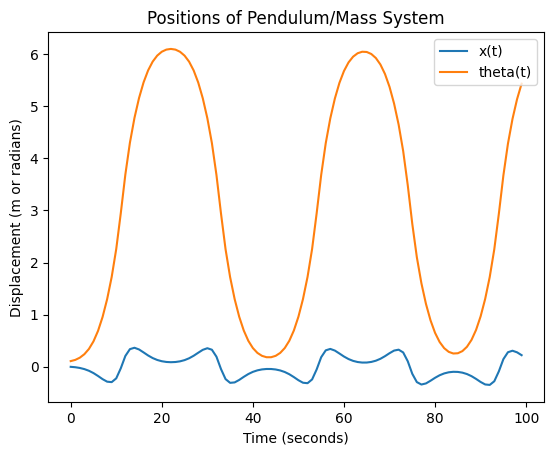

In [61]:
#using numerical solvers, integrate the system from time t_o to t_f,
#applying initial conditions
s0 = np.array([0, 0.1, 0, 0]) # slight perturbation in theta with 0 initial velocity
traj = simulate(dxdt, s0, [0, 10], 0.1, rk4) 
print('\033[1mShape of traj: \033[0m', traj.shape)

#plot below
plt.figure(1)
plt.plot(traj[0])
plt.plot(traj[1])
    
plt.legend(["x(t)", "theta(t)"])
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (m or radians)")
plt.title("Positions of Pendulum/Mass System")


***

## Problem X (0pts)
### **Not required for submission!**

*NOTE: "Problem X" is not required for submission and has zero credit. This is only designed to help you get more familiar with things that are not the primary purposes of this class, but are important in practice, like Python.*

You may now have all the code running to compute the dynamics of some "pendulum stuff"... and you will need to compute more later in this class! One suggestion here, for the purpose of handling more sophisticated systems (like a triple-pendulum!), is to wrap up your code for this homework into several functions. This is not required, and it's fine if you don't want to do it (you can always go back here after you're more familiar with Python and course materials). This is only for some of you who just want to have more Python in their life, just as the saying goes, "life is short, use python".

Why is it better to wrap existing code into functions - isn't it a waste of time? Consider a sort of unrelated example: write a program that computes the trace of a matrix, which is the sum of all diagonal elements. If the matrix is already provided, just like we already computed Lagrangian in the homework, we can do something like this:

In [24]:
mat = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]
trace = mat[0][0] + mat[1][1] + mat[2][2]

However, what if we need to compute the trace of a 5-by-5 matrix instead? Then we need to rewrite the code! In our simple example, this isn't that annoying or time consuming. However, for more complicated problems it could be very annoying, especially when we find that we are basically doing the same thing every time we rewrite the code - manually adding all the diagonal elements together as well as very tedious, especially in case if there are multiple places in the code where we perform the same calculation. Thus, why don't we just write a function once, and it will handle matrices with all possible dimensions for us? The challenge is that the function doesn't know what matrix it will be provided ahead of time! One solution is to require matrix dimension as a function input (you might find this very common in lower-level programming languages like C/C++). But in Python, we have better choice - querying the dimension of your input! Here's one possible implementation:

In [25]:
def compute_trace(mat):
    dim = len(mat)
    trace_val = 0
    for i in range(dim):
        trace_val += mat[i][i]
    return trace_val

mat = [[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]
trace = compute_trace(mat)

Python provides some really nice methods to tell us the dimension of the data! While the default is `len()`, given NumPy or SymPy you can also use `.shape()`. In this way, you can generalize your method through the function, and easily reuse your code later. Besides that, depending on the specific scenarios, some methods can naturally avoid encountering number of parameters, like SymPy's matrix `jacobian()` method. Usually these methods are better choices because their implementations are typically more efficient than using loops (loops are slow). 
    
In this homework, one part of your code you can re-write using a function feature is Problem 3. **Try to write a Python function, which takes in the Lagrangian, a list of variables of the Lagrangian, and returns the Euler-Lagrange equation as a SymPy equation object.** The challenge here is that we don't know how many variables will be provided ahead of time, and the example above might inspire you. 
    
Feel free to use template provided below as a starting point. Note that it's highly recommended to document your function as shown below - letting others understand your code is as important as getting your code to run!

In [26]:
def euler_equations(L, funcs, t):
    """
    Find the Euler-Lagrangian equations given the Lagrangian equation.

    Parameters:
    ============
    L: SymPy Expression
        L should be a SymPy expression containing necessary system 
        configuration variables
    funcs: list of SymPy Functions
        func should included all the system configuration variables
        as functions of time variable "t" in the Lagrangian
    t: SymPy Symbol
        time variable

    Returns:
    ============
    eqns: SymPy Equation
        eqns is the resulting Euler-Lagrangian equations, it should
        be a sinlge SymPy Equation object, each side being a SymPy
        Matrix object
    """
    pass # In Python, "pass" means "do nothing",  many people use it
         # to occupy a space so they don't need to implement a function
         # while getting the program running. Here you just need to 
         # replace it with your own implementation.